## Contents
### 01 import libraries
### 02 load data
### 03 Question 1 (Distribution of Failed Orders)
### 04 Cancellation Flag
### 05 Export orders_wrangled

### 01 importing libraries

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

### 02 load data

In [3]:
# create path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Projects\Gett"

In [5]:
#load offers
offers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'data_offers.csv'))

In [6]:
#load orders
orders = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'data_orders.csv'))

In [7]:
#take a look
offers.shape

(334363, 2)

In [8]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [9]:
orders.shape

(10716, 8)

In [10]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [11]:
orders.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


In [16]:
#check how many orders had a really high eta
df = orders[orders['m_order_eta'] > 1000]

In [17]:
df.shape

(117, 8)

In [24]:
#check how many have a very high cancellation time
df2 = orders[orders['cancellations_time_in_seconds'] > 4000]

In [26]:
df2

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
3442,23:43:11,-0.94760,51.450408,NaN,3000622541402,4,0,4097.0
8369,13:21:20,-0.97823,51.454575,117.0,3000589207012,4,1,4303.0


### 03 Question 1
### Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

<Axes: xlabel='order_status_key,is_driver_assigned_key'>

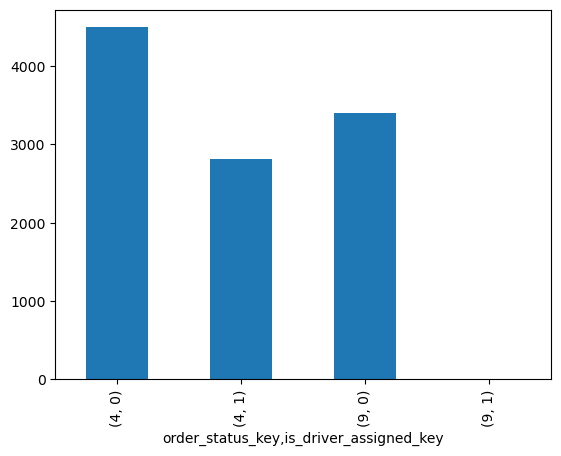

In [31]:
#make a quick and dirty plot
orders.groupby(['order_status_key', 'is_driver_assigned_key']).order_gk.count().plot.bar()

In [32]:
orders.columns

Index(['order_datetime', 'origin_longitude', 'origin_latitude', 'm_order_eta',
       'order_gk', 'order_status_key', 'is_driver_assigned_key',
       'cancellations_time_in_seconds'],
      dtype='object')

In [35]:
#create a crosstab of order_status_key and is_driver_assigned_key
cancelled = pd.crosstab(orders['order_status_key'], orders['is_driver_assigned_key'])

In [34]:
cancelled

is_driver_assigned_key,0,1
order_status_key,,
4,4496,2811
9,3406,3


## 04 Create a Cancelations Flag for orders

In [36]:
#Start with Cancelled by user, no driver assigned
orders.loc[(orders['order_status_key'] == 4) & (orders['is_driver_assigned_key'] == 0), 'cancellations'] = 'User, No'

In [37]:
#Start with Cancelled by user, yes driver assigned
orders.loc[(orders['order_status_key'] == 4) & (orders['is_driver_assigned_key'] == 1), 'cancellations'] = 'User, Yes'

In [38]:
#Start with Cancelled by System, no driver assigned
orders.loc[(orders['order_status_key'] == 9) & (orders['is_driver_assigned_key'] == 0), 'cancellations'] = 'System, No'

In [39]:
#Start with Cancelled by System, yes driver assigned
orders.loc[(orders['order_status_key'] == 9) & (orders['is_driver_assigned_key'] == 1), 'cancellations'] = 'System, Yes'

In [41]:
#take a look
orders['cancellations'].value_counts(dropna = False)

cancellations
User, No       4496
System, No     3406
User, Yes      2811
System, Yes       3
Name: count, dtype: int64

<Axes: xlabel='cancellations'>

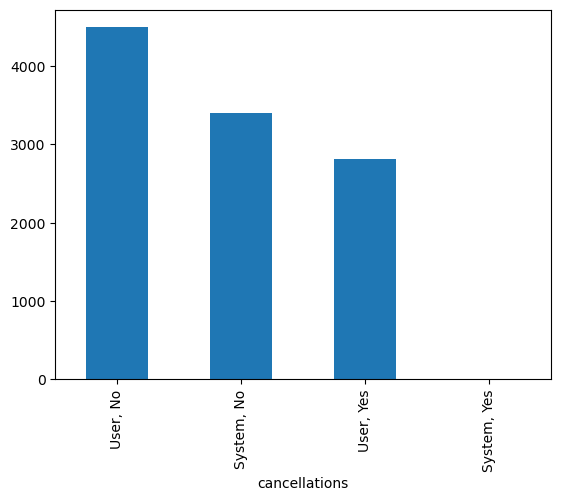

In [44]:
#quick and dirty plot
orders['cancellations'].value_counts(dropna = False).plot.bar()

## 05 export orders


In [46]:
orders.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_wrangled.csv'))